# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

     |████████████████████████████████| 509 kB 30.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 26.2 MB/s eta 0:00:01
  Attempting uninstall: dnspython
    Found existing installation: dnspython 2.0.0
    Uninstalling dnspython-2.0.0:
      Successfully uninstalled dnspython-2.0.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install tweepy

     |████████████████████████████████| 147 kB 23.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install twitter

     |████████████████████████████████| 54 kB 4.1 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [9]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [12]:
client = MongoClient(mongod_connect)
db = client.gp23 # use or create a database named demo
final_project = db.final_project #use or create a collection named tweet_collection
final_project.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [18]:
count = 100 #number of returned tweets, default and max is 100
geocode = "33.6056695,-112.405932,150mi"  # define the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [19]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        final_project.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 00:53:05 +0000 2020'
'Sat Dec 12 00:52:04 +0000 2020'
'Sat Dec 12 00:50:02 +0000 2020'
'Sat Dec 12 00:42:30 +0000 2020'
'Sat Dec 12 00:41:06 +0000 2020'
'Sat Dec 12 00:40:00 +0000 2020'
'Sat Dec 12 00:35:22 +0000 2020'
'Sat Dec 12 00:34:51 +0000 2020'
'Sat Dec 12 00:33:48 +0000 2020'
'Sat Dec 12 00:32:21 +0000 2020'
'Sat Dec 12 00:31:07 +0000 2020'
'Sat Dec 12 00:24:18 +0000 2020'
'Sat Dec 12 00:22:56 +0000 2020'
'Sat Dec 12 00:22:39 +0000 2020'
'Sat Dec 12 00:21:27 +0000 2020'
'Sat Dec 12 00:18:25 +0000 2020'
'Sat Dec 12 00:17:23 +0000 2020'
'Sat Dec 12 00:16:44 +0000 2020'
'Sat Dec 12 00:16:32 +0000 2020'
'Sat Dec 12 00:14:21 +0000 2020'
'Sat Dec 12 00:14:17 +0000 2020'
'Sat Dec 12 00:13:57 +0000 2020'
'Sat Dec 12 00:12:35 +0000 2020'
'Sat Dec 12 00:12:25 +0000 2020'
'Sat Dec 12 00:11:33 +0000 2020'
'Sat Dec 12 00:11:31 +0000 2020'
'Sat Dec 12 00:10:55 +0000 2020'
'Sat Dec 12 00:07:45 +0000 2020'
'Sat Dec 12 00:07:08 +0000 2020'
'Sat Dec 12 00:06:59 +0000 2020'
'Sat Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [23]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            final_project.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Dec 10 02:43:33 +0000 2020'
'Thu Dec 10 02:39:04 +0000 2020'
'Thu Dec 10 02:37:58 +0000 2020'
'Thu Dec 10 02:34:23 +0000 2020'
'Thu Dec 10 02:34:18 +0000 2020'
'Thu Dec 10 02:33:45 +0000 2020'
'Thu Dec 10 02:33:39 +0000 2020'
'Thu Dec 10 02:32:57 +0000 2020'
'Thu Dec 10 02:31:31 +0000 2020'
'Thu Dec 10 02:30:57 +0000 2020'
'Thu Dec 10 02:26:51 +0000 2020'
'Thu Dec 10 02:26:48 +0000 2020'
'Thu Dec 10 02:26:47 +0000 2020'
'Thu Dec 10 02:26:24 +0000 2020'
'Thu Dec 10 02:23:42 +0000 2020'
'Thu Dec 10 02:20:34 +0000 2020'
'Thu Dec 10 02:20:05 +0000 2020'
'Thu Dec 10 02:19:49 +0000 2020'
'Thu Dec 10 02:18:06 +0000 2020'
'Thu Dec 10 02:17:51 +0000 2020'
'Thu Dec 10 02:16:42 +0000 2020'
'Thu Dec 10 02:16:08 +0000 2020'
'Thu Dec 10 02:15:11 +0000 2020'
'Thu Dec 10 02:14:57 +0000 2020'
'Thu Dec 10 02:14:55 +0000 2020'
'Thu Dec 10 02:14:05 +0000 2020'
'Thu Dec 10 02:14:01 +0000 2020'
'Thu Dec 10 02:13:38 +0000 2020'
'Thu Dec 10 02:13:23 +0000 2020'
'Thu Dec 10 02:13:07 +0000 2020'
'Thu Dec 1

'Wed Dec 09 21:02:39 +0000 2020'
'Wed Dec 09 21:00:45 +0000 2020'
'Wed Dec 09 20:57:38 +0000 2020'
'Wed Dec 09 20:57:37 +0000 2020'
'Wed Dec 09 20:55:00 +0000 2020'
'Wed Dec 09 20:54:50 +0000 2020'
'Wed Dec 09 20:54:13 +0000 2020'
'Wed Dec 09 20:52:36 +0000 2020'
'Wed Dec 09 20:48:39 +0000 2020'
'Wed Dec 09 20:47:16 +0000 2020'
'Wed Dec 09 20:46:16 +0000 2020'
'Wed Dec 09 20:46:10 +0000 2020'
'Wed Dec 09 20:45:24 +0000 2020'
'Wed Dec 09 20:44:45 +0000 2020'
'Wed Dec 09 20:43:10 +0000 2020'
'Wed Dec 09 20:41:49 +0000 2020'
'Wed Dec 09 20:41:16 +0000 2020'
'Wed Dec 09 20:40:42 +0000 2020'
'Wed Dec 09 20:36:57 +0000 2020'
'Wed Dec 09 20:35:49 +0000 2020'
'Wed Dec 09 20:35:38 +0000 2020'
'Wed Dec 09 20:35:20 +0000 2020'
'Wed Dec 09 20:34:47 +0000 2020'
'Wed Dec 09 20:34:30 +0000 2020'
'Wed Dec 09 20:34:06 +0000 2020'
'Wed Dec 09 20:33:28 +0000 2020'
'Wed Dec 09 20:32:55 +0000 2020'
'Wed Dec 09 20:29:35 +0000 2020'
'Wed Dec 09 20:28:47 +0000 2020'
'Wed Dec 09 20:24:37 +0000 2020'
'Wed Dec 0

'Wed Dec 09 16:50:20 +0000 2020'
'Wed Dec 09 16:49:33 +0000 2020'
'Wed Dec 09 16:49:27 +0000 2020'
'Wed Dec 09 16:49:25 +0000 2020'
'Wed Dec 09 16:49:02 +0000 2020'
'Wed Dec 09 16:48:20 +0000 2020'
'Wed Dec 09 16:47:59 +0000 2020'
'Wed Dec 09 16:47:15 +0000 2020'
'Wed Dec 09 16:46:59 +0000 2020'
'Wed Dec 09 16:46:58 +0000 2020'
'Wed Dec 09 16:46:05 +0000 2020'
'Wed Dec 09 16:45:47 +0000 2020'
'Wed Dec 09 16:45:22 +0000 2020'
'Wed Dec 09 16:44:32 +0000 2020'
'Wed Dec 09 16:44:06 +0000 2020'
'Wed Dec 09 16:43:39 +0000 2020'
'Wed Dec 09 16:43:16 +0000 2020'
'Wed Dec 09 16:42:36 +0000 2020'
'Wed Dec 09 16:42:13 +0000 2020'
'Wed Dec 09 16:41:48 +0000 2020'
'Wed Dec 09 16:41:47 +0000 2020'
'Wed Dec 09 16:41:28 +0000 2020'
'Wed Dec 09 16:40:54 +0000 2020'
'Wed Dec 09 16:40:37 +0000 2020'
'Wed Dec 09 16:40:35 +0000 2020'
'Wed Dec 09 16:40:05 +0000 2020'
'Wed Dec 09 16:39:51 +0000 2020'
'Wed Dec 09 16:39:32 +0000 2020'
'Wed Dec 09 16:39:28 +0000 2020'
'Wed Dec 09 16:39:08 +0000 2020'
'Wed Dec 0

'Wed Dec 09 08:17:31 +0000 2020'
'Wed Dec 09 08:07:32 +0000 2020'
'Wed Dec 09 08:07:20 +0000 2020'
'Wed Dec 09 08:07:20 +0000 2020'
'Wed Dec 09 08:06:59 +0000 2020'
'Wed Dec 09 08:06:33 +0000 2020'
'Wed Dec 09 08:05:56 +0000 2020'
'Wed Dec 09 08:01:26 +0000 2020'
'Wed Dec 09 07:59:38 +0000 2020'
'Wed Dec 09 07:55:55 +0000 2020'
'Wed Dec 09 07:49:13 +0000 2020'
'Wed Dec 09 07:48:02 +0000 2020'
'Wed Dec 09 07:45:31 +0000 2020'
'Wed Dec 09 07:44:27 +0000 2020'
'Wed Dec 09 07:26:40 +0000 2020'
'Wed Dec 09 07:24:25 +0000 2020'
'Wed Dec 09 07:23:55 +0000 2020'
'Wed Dec 09 07:02:35 +0000 2020'
'Wed Dec 09 07:00:30 +0000 2020'
'Wed Dec 09 06:58:38 +0000 2020'
'Wed Dec 09 06:51:11 +0000 2020'
'Wed Dec 09 06:49:37 +0000 2020'
'Wed Dec 09 06:37:58 +0000 2020'
'Wed Dec 09 06:36:29 +0000 2020'
'Wed Dec 09 06:35:25 +0000 2020'
'Wed Dec 09 06:20:56 +0000 2020'
'Wed Dec 09 06:19:50 +0000 2020'
'Wed Dec 09 06:19:33 +0000 2020'
'Wed Dec 09 06:15:57 +0000 2020'
'Wed Dec 09 06:02:38 +0000 2020'
'Wed Dec 0

'Wed Dec 09 01:49:19 +0000 2020'
'Wed Dec 09 01:49:02 +0000 2020'
'Wed Dec 09 01:49:02 +0000 2020'
'Wed Dec 09 01:48:53 +0000 2020'
'Wed Dec 09 01:47:38 +0000 2020'
'Wed Dec 09 01:47:03 +0000 2020'
'Wed Dec 09 01:46:05 +0000 2020'
'Wed Dec 09 01:45:43 +0000 2020'
'Wed Dec 09 01:45:25 +0000 2020'
'Wed Dec 09 01:45:21 +0000 2020'
'Wed Dec 09 01:45:12 +0000 2020'
'Wed Dec 09 01:45:08 +0000 2020'
'Wed Dec 09 01:44:44 +0000 2020'
'Wed Dec 09 01:44:43 +0000 2020'
'Wed Dec 09 01:44:17 +0000 2020'
'Wed Dec 09 01:44:14 +0000 2020'
'Wed Dec 09 01:44:09 +0000 2020'
'Wed Dec 09 01:44:07 +0000 2020'
'Wed Dec 09 01:43:54 +0000 2020'
'Wed Dec 09 01:43:52 +0000 2020'
'Wed Dec 09 01:43:46 +0000 2020'
'Wed Dec 09 01:43:45 +0000 2020'
'Wed Dec 09 01:43:18 +0000 2020'
'Wed Dec 09 01:42:48 +0000 2020'
'Wed Dec 09 01:42:25 +0000 2020'
'Wed Dec 09 01:41:37 +0000 2020'
'Wed Dec 09 01:41:30 +0000 2020'
'Wed Dec 09 01:40:58 +0000 2020'
'Wed Dec 09 01:40:06 +0000 2020'
'Wed Dec 09 01:39:46 +0000 2020'
'Wed Dec 0

'Tue Dec 08 21:41:17 +0000 2020'
'Tue Dec 08 21:41:16 +0000 2020'
'Tue Dec 08 21:40:06 +0000 2020'
'Tue Dec 08 21:39:35 +0000 2020'
'Tue Dec 08 21:38:30 +0000 2020'
'Tue Dec 08 21:38:02 +0000 2020'
'Tue Dec 08 21:37:44 +0000 2020'
'Tue Dec 08 21:34:15 +0000 2020'
'Tue Dec 08 21:33:31 +0000 2020'
'Tue Dec 08 21:30:52 +0000 2020'
'Tue Dec 08 21:30:32 +0000 2020'
'Tue Dec 08 21:30:14 +0000 2020'
'Tue Dec 08 21:29:55 +0000 2020'
'Tue Dec 08 21:28:30 +0000 2020'
'Tue Dec 08 21:24:50 +0000 2020'
'Tue Dec 08 21:23:12 +0000 2020'
'Tue Dec 08 21:21:05 +0000 2020'
'Tue Dec 08 21:20:52 +0000 2020'
'Tue Dec 08 21:18:42 +0000 2020'
'Tue Dec 08 21:17:52 +0000 2020'
'Tue Dec 08 21:15:44 +0000 2020'
'Tue Dec 08 21:15:27 +0000 2020'
'Tue Dec 08 21:11:20 +0000 2020'
'Tue Dec 08 21:10:25 +0000 2020'
'Tue Dec 08 21:10:12 +0000 2020'
'Tue Dec 08 21:09:43 +0000 2020'
'Tue Dec 08 21:09:37 +0000 2020'
'Tue Dec 08 21:09:35 +0000 2020'
'Tue Dec 08 21:06:11 +0000 2020'
'Tue Dec 08 21:04:13 +0000 2020'
'Tue Dec 0

'Tue Dec 08 17:56:57 +0000 2020'
'Tue Dec 08 17:56:27 +0000 2020'
'Tue Dec 08 17:56:23 +0000 2020'
'Tue Dec 08 17:55:35 +0000 2020'
'Tue Dec 08 17:55:24 +0000 2020'
'Tue Dec 08 17:52:24 +0000 2020'
'Tue Dec 08 17:52:12 +0000 2020'
'Tue Dec 08 17:50:56 +0000 2020'
'Tue Dec 08 17:50:47 +0000 2020'
'Tue Dec 08 17:49:51 +0000 2020'
'Tue Dec 08 17:49:31 +0000 2020'
'Tue Dec 08 17:49:30 +0000 2020'
'Tue Dec 08 17:48:22 +0000 2020'
'Tue Dec 08 17:46:34 +0000 2020'
'Tue Dec 08 17:46:33 +0000 2020'
'Tue Dec 08 17:46:23 +0000 2020'
'Tue Dec 08 17:45:56 +0000 2020'
'Tue Dec 08 17:45:29 +0000 2020'
'Tue Dec 08 17:45:26 +0000 2020'
'Tue Dec 08 17:44:38 +0000 2020'
'Tue Dec 08 17:44:18 +0000 2020'
'Tue Dec 08 17:44:07 +0000 2020'
'Tue Dec 08 17:43:49 +0000 2020'
'Tue Dec 08 17:43:29 +0000 2020'
'Tue Dec 08 17:43:14 +0000 2020'
'Tue Dec 08 17:42:31 +0000 2020'
'Tue Dec 08 17:41:58 +0000 2020'
'Tue Dec 08 17:41:50 +0000 2020'
'Tue Dec 08 17:41:14 +0000 2020'
'Tue Dec 08 17:40:30 +0000 2020'
'Tue Dec 0

'Tue Dec 08 15:53:42 +0000 2020'
'Tue Dec 08 15:52:48 +0000 2020'
'Tue Dec 08 15:52:46 +0000 2020'
'Tue Dec 08 15:52:43 +0000 2020'
'Tue Dec 08 15:52:16 +0000 2020'
'Tue Dec 08 15:51:26 +0000 2020'
'Tue Dec 08 15:51:03 +0000 2020'
'Tue Dec 08 15:50:55 +0000 2020'
'Tue Dec 08 15:50:49 +0000 2020'
'Tue Dec 08 15:50:37 +0000 2020'
'Tue Dec 08 15:48:18 +0000 2020'
'Tue Dec 08 15:47:30 +0000 2020'
'Tue Dec 08 15:47:09 +0000 2020'
'Tue Dec 08 15:46:59 +0000 2020'
'Tue Dec 08 15:46:20 +0000 2020'
'Tue Dec 08 15:45:59 +0000 2020'
'Tue Dec 08 15:45:41 +0000 2020'
'Tue Dec 08 15:45:39 +0000 2020'
'Tue Dec 08 15:45:35 +0000 2020'
'Tue Dec 08 15:45:16 +0000 2020'
'Tue Dec 08 15:44:04 +0000 2020'
'Tue Dec 08 15:42:08 +0000 2020'
'Tue Dec 08 15:42:04 +0000 2020'
'Tue Dec 08 15:41:33 +0000 2020'
'Tue Dec 08 15:41:28 +0000 2020'
'Tue Dec 08 15:41:23 +0000 2020'
'Tue Dec 08 15:41:10 +0000 2020'
'Tue Dec 08 15:41:04 +0000 2020'
'Tue Dec 08 15:40:59 +0000 2020'
'Tue Dec 08 15:40:21 +0000 2020'
'Tue Dec 0

'Tue Dec 08 02:10:12 +0000 2020'
'Tue Dec 08 02:06:57 +0000 2020'
'Tue Dec 08 02:06:25 +0000 2020'
'Tue Dec 08 02:03:50 +0000 2020'
'Tue Dec 08 01:56:24 +0000 2020'
'Tue Dec 08 01:53:29 +0000 2020'
'Tue Dec 08 01:51:04 +0000 2020'
'Tue Dec 08 01:50:16 +0000 2020'
'Tue Dec 08 01:46:40 +0000 2020'
'Tue Dec 08 01:43:06 +0000 2020'
'Tue Dec 08 01:43:04 +0000 2020'
'Tue Dec 08 01:42:22 +0000 2020'
'Tue Dec 08 01:38:54 +0000 2020'
'Tue Dec 08 01:35:50 +0000 2020'
'Tue Dec 08 01:35:35 +0000 2020'
'Tue Dec 08 01:35:29 +0000 2020'
'Tue Dec 08 01:34:26 +0000 2020'
'Tue Dec 08 01:34:22 +0000 2020'
'Tue Dec 08 01:33:37 +0000 2020'
'Tue Dec 08 01:33:19 +0000 2020'
'Tue Dec 08 01:33:17 +0000 2020'
'Tue Dec 08 01:32:58 +0000 2020'
'Tue Dec 08 01:31:18 +0000 2020'
'Tue Dec 08 01:28:17 +0000 2020'
'Tue Dec 08 01:28:16 +0000 2020'
'Tue Dec 08 01:25:10 +0000 2020'
'Tue Dec 08 01:24:33 +0000 2020'
'Tue Dec 08 01:24:11 +0000 2020'
'Tue Dec 08 01:16:18 +0000 2020'
'Tue Dec 08 01:15:49 +0000 2020'
'Tue Dec 0

'Mon Dec 07 19:39:53 +0000 2020'
'Mon Dec 07 19:39:36 +0000 2020'
'Mon Dec 07 19:39:03 +0000 2020'
'Mon Dec 07 19:38:17 +0000 2020'
'Mon Dec 07 19:38:03 +0000 2020'
'Mon Dec 07 19:34:42 +0000 2020'
'Mon Dec 07 19:33:21 +0000 2020'
'Mon Dec 07 19:30:38 +0000 2020'
'Mon Dec 07 19:29:09 +0000 2020'
'Mon Dec 07 19:29:04 +0000 2020'
'Mon Dec 07 19:24:08 +0000 2020'
'Mon Dec 07 19:23:29 +0000 2020'
'Mon Dec 07 19:22:11 +0000 2020'
'Mon Dec 07 19:21:28 +0000 2020'
'Mon Dec 07 19:19:27 +0000 2020'
'Mon Dec 07 19:19:13 +0000 2020'
'Mon Dec 07 19:18:56 +0000 2020'
'Mon Dec 07 19:17:48 +0000 2020'
'Mon Dec 07 19:16:39 +0000 2020'
'Mon Dec 07 19:16:32 +0000 2020'
'Mon Dec 07 19:14:25 +0000 2020'
'Mon Dec 07 19:13:02 +0000 2020'
'Mon Dec 07 19:12:39 +0000 2020'
'Mon Dec 07 19:12:36 +0000 2020'
'Mon Dec 07 19:11:35 +0000 2020'
'Mon Dec 07 19:10:50 +0000 2020'
'Mon Dec 07 19:10:04 +0000 2020'
'Mon Dec 07 19:09:50 +0000 2020'
'Mon Dec 07 19:09:20 +0000 2020'
'Mon Dec 07 19:09:17 +0000 2020'
'Mon Dec 0

'Mon Dec 07 16:30:59 +0000 2020'
'Mon Dec 07 16:29:00 +0000 2020'
'Mon Dec 07 16:28:12 +0000 2020'
'Mon Dec 07 16:25:48 +0000 2020'
'Mon Dec 07 16:24:12 +0000 2020'
'Mon Dec 07 16:22:06 +0000 2020'
'Mon Dec 07 16:21:27 +0000 2020'
'Mon Dec 07 16:18:23 +0000 2020'
'Mon Dec 07 16:15:43 +0000 2020'
'Mon Dec 07 16:15:20 +0000 2020'
'Mon Dec 07 16:13:23 +0000 2020'
'Mon Dec 07 16:12:48 +0000 2020'
'Mon Dec 07 16:11:58 +0000 2020'
'Mon Dec 07 16:11:20 +0000 2020'
'Mon Dec 07 16:11:15 +0000 2020'
'Mon Dec 07 16:10:53 +0000 2020'
'Mon Dec 07 16:10:39 +0000 2020'
'Mon Dec 07 16:10:29 +0000 2020'
'Mon Dec 07 16:10:10 +0000 2020'
'Mon Dec 07 16:09:56 +0000 2020'
'Mon Dec 07 16:09:24 +0000 2020'
'Mon Dec 07 16:08:45 +0000 2020'
'Mon Dec 07 16:08:33 +0000 2020'
'Mon Dec 07 16:08:07 +0000 2020'
'Mon Dec 07 16:06:12 +0000 2020'
'Mon Dec 07 16:06:02 +0000 2020'
'Mon Dec 07 16:04:44 +0000 2020'
'Mon Dec 07 16:04:41 +0000 2020'
'Mon Dec 07 16:04:00 +0000 2020'
'Mon Dec 07 16:03:52 +0000 2020'
'Mon Dec 0

'Mon Dec 07 05:23:26 +0000 2020'
'Mon Dec 07 05:23:19 +0000 2020'
'Mon Dec 07 05:22:44 +0000 2020'
'Mon Dec 07 05:21:18 +0000 2020'
'Mon Dec 07 05:16:57 +0000 2020'
'Mon Dec 07 05:15:28 +0000 2020'
'Mon Dec 07 05:13:30 +0000 2020'
'Mon Dec 07 05:12:25 +0000 2020'
'Mon Dec 07 05:09:21 +0000 2020'
'Mon Dec 07 05:07:16 +0000 2020'
'Mon Dec 07 04:55:17 +0000 2020'
'Mon Dec 07 04:53:04 +0000 2020'
'Mon Dec 07 04:50:32 +0000 2020'
'Mon Dec 07 04:50:25 +0000 2020'
'Mon Dec 07 04:47:59 +0000 2020'
'Mon Dec 07 04:47:58 +0000 2020'
'Mon Dec 07 04:45:32 +0000 2020'
'Mon Dec 07 04:43:34 +0000 2020'
'Mon Dec 07 04:40:20 +0000 2020'
'Mon Dec 07 04:36:09 +0000 2020'
'Mon Dec 07 04:35:31 +0000 2020'
'Mon Dec 07 04:34:33 +0000 2020'
'Mon Dec 07 04:32:40 +0000 2020'
'Mon Dec 07 04:32:09 +0000 2020'
'Mon Dec 07 04:31:10 +0000 2020'
'Mon Dec 07 04:30:32 +0000 2020'
'Mon Dec 07 04:28:41 +0000 2020'
'Mon Dec 07 04:27:52 +0000 2020'
'Mon Dec 07 04:27:27 +0000 2020'
'Mon Dec 07 04:26:48 +0000 2020'
'Mon Dec 0

'Mon Dec 07 00:05:25 +0000 2020'
'Mon Dec 07 00:04:34 +0000 2020'
'Mon Dec 07 00:04:21 +0000 2020'
'Mon Dec 07 00:03:54 +0000 2020'
'Mon Dec 07 00:02:42 +0000 2020'
'Mon Dec 07 00:01:54 +0000 2020'
'Mon Dec 07 00:01:07 +0000 2020'
'Mon Dec 07 00:00:59 +0000 2020'
'Mon Dec 07 00:00:54 +0000 2020'
'Mon Dec 07 00:00:02 +0000 2020'
'Mon Dec 07 00:00:02 +0000 2020'
'Sun Dec 06 23:52:54 +0000 2020'
'Sun Dec 06 23:51:53 +0000 2020'
'Sun Dec 06 23:50:27 +0000 2020'
'Sun Dec 06 23:49:48 +0000 2020'
'Sun Dec 06 23:49:15 +0000 2020'
'Sun Dec 06 23:49:11 +0000 2020'
'Sun Dec 06 23:47:45 +0000 2020'
'Sun Dec 06 23:44:13 +0000 2020'
'Sun Dec 06 23:44:08 +0000 2020'
'Sun Dec 06 23:43:53 +0000 2020'
'Sun Dec 06 23:43:45 +0000 2020'
'Sun Dec 06 23:43:32 +0000 2020'
'Sun Dec 06 23:43:17 +0000 2020'
'Sun Dec 06 23:43:08 +0000 2020'
'Sun Dec 06 23:42:47 +0000 2020'
'Sun Dec 06 23:40:56 +0000 2020'
'Sun Dec 06 23:39:12 +0000 2020'
'Sun Dec 06 23:38:03 +0000 2020'
'Sun Dec 06 23:37:24 +0000 2020'
'Sun Dec 0

'Sun Dec 06 21:20:39 +0000 2020'
'Sun Dec 06 21:20:24 +0000 2020'
'Sun Dec 06 21:20:18 +0000 2020'
'Sun Dec 06 21:19:58 +0000 2020'
'Sun Dec 06 21:19:49 +0000 2020'
'Sun Dec 06 21:19:38 +0000 2020'
'Sun Dec 06 21:19:24 +0000 2020'
'Sun Dec 06 21:19:02 +0000 2020'
'Sun Dec 06 21:18:44 +0000 2020'
'Sun Dec 06 21:18:40 +0000 2020'
'Sun Dec 06 21:18:32 +0000 2020'
'Sun Dec 06 21:18:25 +0000 2020'
'Sun Dec 06 21:18:14 +0000 2020'
'Sun Dec 06 21:18:07 +0000 2020'
'Sun Dec 06 21:18:00 +0000 2020'
'Sun Dec 06 21:17:44 +0000 2020'
'Sun Dec 06 21:17:37 +0000 2020'
'Sun Dec 06 21:17:27 +0000 2020'
'Sun Dec 06 21:17:05 +0000 2020'
'Sun Dec 06 21:16:57 +0000 2020'
'Sun Dec 06 21:16:27 +0000 2020'
'Sun Dec 06 21:15:57 +0000 2020'
'Sun Dec 06 21:15:31 +0000 2020'
'Sun Dec 06 21:14:36 +0000 2020'
'Sun Dec 06 21:14:14 +0000 2020'
'Sun Dec 06 21:12:57 +0000 2020'
'Sun Dec 06 21:12:22 +0000 2020'
'Sun Dec 06 21:12:17 +0000 2020'
'Sun Dec 06 21:12:09 +0000 2020'
'Sun Dec 06 21:11:43 +0000 2020'
'Sun Dec 0

'Sun Dec 06 14:06:35 +0000 2020'
'Sun Dec 06 14:05:51 +0000 2020'
'Sun Dec 06 14:01:09 +0000 2020'
'Sun Dec 06 13:33:05 +0000 2020'
'Sun Dec 06 13:13:19 +0000 2020'
'Sun Dec 06 13:02:01 +0000 2020'
'Sun Dec 06 12:57:43 +0000 2020'
'Sun Dec 06 12:49:23 +0000 2020'
'Sun Dec 06 11:47:19 +0000 2020'
'Sun Dec 06 11:45:05 +0000 2020'
'Sun Dec 06 11:31:56 +0000 2020'
'Sun Dec 06 10:05:26 +0000 2020'
'Sun Dec 06 08:44:22 +0000 2020'
'Sun Dec 06 08:36:27 +0000 2020'
'Sun Dec 06 08:18:32 +0000 2020'
'Sun Dec 06 07:56:39 +0000 2020'
'Sun Dec 06 07:43:07 +0000 2020'
'Sun Dec 06 07:39:51 +0000 2020'
'Sun Dec 06 07:02:30 +0000 2020'
'Sun Dec 06 07:00:43 +0000 2020'
'Sun Dec 06 06:58:15 +0000 2020'
'Sun Dec 06 06:56:42 +0000 2020'
'Sun Dec 06 06:54:05 +0000 2020'
'Sun Dec 06 06:52:54 +0000 2020'
'Sun Dec 06 06:52:22 +0000 2020'
'Sun Dec 06 06:51:33 +0000 2020'
'Sun Dec 06 06:50:50 +0000 2020'
'Sun Dec 06 06:39:51 +0000 2020'
'Sun Dec 06 06:39:40 +0000 2020'
'Sun Dec 06 06:38:45 +0000 2020'
'Sun Dec 0

'Sat Dec 05 20:21:12 +0000 2020'
'Sat Dec 05 20:21:11 +0000 2020'
'Sat Dec 05 20:20:09 +0000 2020'
'Sat Dec 05 20:19:23 +0000 2020'
'Sat Dec 05 20:18:37 +0000 2020'
'Sat Dec 05 20:18:31 +0000 2020'
'Sat Dec 05 20:17:11 +0000 2020'
'Sat Dec 05 20:16:53 +0000 2020'
'Sat Dec 05 20:16:03 +0000 2020'
'Sat Dec 05 20:15:18 +0000 2020'
'Sat Dec 05 20:13:33 +0000 2020'
'Sat Dec 05 20:11:52 +0000 2020'
'Sat Dec 05 20:10:37 +0000 2020'
'Sat Dec 05 20:09:56 +0000 2020'
'Sat Dec 05 20:07:24 +0000 2020'
'Sat Dec 05 20:06:41 +0000 2020'
'Sat Dec 05 20:05:14 +0000 2020'
'Sat Dec 05 20:04:54 +0000 2020'
'Sat Dec 05 20:04:01 +0000 2020'
'Sat Dec 05 20:00:38 +0000 2020'
'Sat Dec 05 19:53:18 +0000 2020'
'Sat Dec 05 19:51:47 +0000 2020'
'Sat Dec 05 19:51:38 +0000 2020'
'Sat Dec 05 19:50:30 +0000 2020'
'Sat Dec 05 19:48:44 +0000 2020'
'Sat Dec 05 19:48:07 +0000 2020'
'Sat Dec 05 19:45:45 +0000 2020'
'Sat Dec 05 19:44:37 +0000 2020'
'Sat Dec 05 19:43:55 +0000 2020'
'Sat Dec 05 19:42:56 +0000 2020'
'Sat Dec 0

'Sat Dec 05 15:10:11 +0000 2020'
'Sat Dec 05 15:10:10 +0000 2020'
'Sat Dec 05 15:09:43 +0000 2020'
'Sat Dec 05 15:09:31 +0000 2020'
'Sat Dec 05 15:09:25 +0000 2020'
'Sat Dec 05 15:09:23 +0000 2020'
'Sat Dec 05 15:09:09 +0000 2020'
'Sat Dec 05 15:08:25 +0000 2020'
'Sat Dec 05 15:08:06 +0000 2020'
'Sat Dec 05 15:08:01 +0000 2020'
'Sat Dec 05 15:07:56 +0000 2020'
'Sat Dec 05 15:07:32 +0000 2020'
'Sat Dec 05 15:07:20 +0000 2020'
'Sat Dec 05 15:06:34 +0000 2020'
'Sat Dec 05 15:06:32 +0000 2020'
'Sat Dec 05 15:06:21 +0000 2020'
'Sat Dec 05 15:04:16 +0000 2020'
'Sat Dec 05 15:02:00 +0000 2020'
'Sat Dec 05 15:01:25 +0000 2020'
'Sat Dec 05 15:00:57 +0000 2020'
'Sat Dec 05 15:00:57 +0000 2020'
'Sat Dec 05 15:00:37 +0000 2020'
'Sat Dec 05 14:51:50 +0000 2020'
'Sat Dec 05 14:48:22 +0000 2020'
'Sat Dec 05 14:48:18 +0000 2020'
'Sat Dec 05 14:39:07 +0000 2020'
'Sat Dec 05 14:32:09 +0000 2020'
'Sat Dec 05 14:27:04 +0000 2020'
'Sat Dec 05 14:24:16 +0000 2020'
'Sat Dec 05 14:21:09 +0000 2020'
'Sat Dec 0

'Fri Dec 04 23:00:01 +0000 2020'
'Fri Dec 04 22:59:54 +0000 2020'
'Fri Dec 04 22:58:00 +0000 2020'
'Fri Dec 04 22:55:10 +0000 2020'
'Fri Dec 04 22:49:55 +0000 2020'
'Fri Dec 04 22:47:47 +0000 2020'
'Fri Dec 04 22:43:51 +0000 2020'
'Fri Dec 04 22:40:28 +0000 2020'
'Fri Dec 04 22:38:44 +0000 2020'
'Fri Dec 04 22:37:39 +0000 2020'
'Fri Dec 04 22:37:13 +0000 2020'
'Fri Dec 04 22:36:18 +0000 2020'
'Fri Dec 04 22:31:10 +0000 2020'
'Fri Dec 04 22:25:01 +0000 2020'
'Fri Dec 04 22:19:52 +0000 2020'
'Fri Dec 04 22:17:05 +0000 2020'
'Fri Dec 04 22:15:26 +0000 2020'
'Fri Dec 04 22:14:12 +0000 2020'
'Fri Dec 04 22:08:03 +0000 2020'
'Fri Dec 04 21:56:04 +0000 2020'
'Fri Dec 04 21:55:10 +0000 2020'
'Fri Dec 04 21:50:48 +0000 2020'
'Fri Dec 04 21:48:48 +0000 2020'
'Fri Dec 04 21:48:20 +0000 2020'
'Fri Dec 04 21:45:22 +0000 2020'
'Fri Dec 04 21:45:00 +0000 2020'
'Fri Dec 04 21:44:04 +0000 2020'
'Fri Dec 04 21:42:02 +0000 2020'
'Fri Dec 04 21:39:28 +0000 2020'
'Fri Dec 04 21:39:27 +0000 2020'
'Fri Dec 0

'Fri Dec 04 15:51:54 +0000 2020'
'Fri Dec 04 15:51:52 +0000 2020'
'Fri Dec 04 15:51:30 +0000 2020'
'Fri Dec 04 15:51:28 +0000 2020'
'Fri Dec 04 15:50:56 +0000 2020'
'Fri Dec 04 15:50:32 +0000 2020'
'Fri Dec 04 15:49:56 +0000 2020'
'Fri Dec 04 15:49:36 +0000 2020'
'Fri Dec 04 15:43:39 +0000 2020'
'Fri Dec 04 15:42:46 +0000 2020'
'Fri Dec 04 15:42:45 +0000 2020'
'Fri Dec 04 15:42:29 +0000 2020'
'Fri Dec 04 15:42:22 +0000 2020'
'Fri Dec 04 15:41:47 +0000 2020'
'Fri Dec 04 15:41:22 +0000 2020'
'Fri Dec 04 15:39:14 +0000 2020'
'Fri Dec 04 15:39:00 +0000 2020'
'Fri Dec 04 15:38:39 +0000 2020'
'Fri Dec 04 15:37:47 +0000 2020'
'Fri Dec 04 15:37:30 +0000 2020'
'Fri Dec 04 15:36:18 +0000 2020'
'Fri Dec 04 15:35:43 +0000 2020'
'Fri Dec 04 15:35:20 +0000 2020'
'Fri Dec 04 15:35:16 +0000 2020'
'Fri Dec 04 15:34:58 +0000 2020'
'Fri Dec 04 15:34:33 +0000 2020'
'Fri Dec 04 15:34:13 +0000 2020'
'Fri Dec 04 15:34:07 +0000 2020'
'Fri Dec 04 15:34:06 +0000 2020'
'Fri Dec 04 15:33:49 +0000 2020'
'Fri Dec 0

'Fri Dec 04 02:14:17 +0000 2020'
'Fri Dec 04 02:11:28 +0000 2020'
'Fri Dec 04 02:10:18 +0000 2020'
'Fri Dec 04 02:10:17 +0000 2020'
'Fri Dec 04 02:07:11 +0000 2020'
'Fri Dec 04 02:05:43 +0000 2020'
'Fri Dec 04 02:05:02 +0000 2020'
'Fri Dec 04 02:01:34 +0000 2020'
'Fri Dec 04 02:00:24 +0000 2020'
'Fri Dec 04 02:00:08 +0000 2020'
'Fri Dec 04 01:55:33 +0000 2020'
'Fri Dec 04 01:54:42 +0000 2020'
'Fri Dec 04 01:49:10 +0000 2020'
'Fri Dec 04 01:39:01 +0000 2020'
'Fri Dec 04 01:32:48 +0000 2020'
'Fri Dec 04 01:31:51 +0000 2020'
'Fri Dec 04 01:25:02 +0000 2020'
'Fri Dec 04 01:23:03 +0000 2020'
'Fri Dec 04 01:22:55 +0000 2020'
'Fri Dec 04 01:20:46 +0000 2020'
'Fri Dec 04 01:19:56 +0000 2020'
'Fri Dec 04 01:17:57 +0000 2020'
'Fri Dec 04 01:15:02 +0000 2020'
'Fri Dec 04 01:14:28 +0000 2020'
'Fri Dec 04 01:05:56 +0000 2020'
'Fri Dec 04 01:00:28 +0000 2020'
'Fri Dec 04 00:59:16 +0000 2020'
'Fri Dec 04 00:58:33 +0000 2020'
'Fri Dec 04 00:57:06 +0000 2020'
'Fri Dec 04 00:55:35 +0000 2020'
'Fri Dec 0

'Thu Dec 03 17:48:09 +0000 2020'
'Thu Dec 03 17:47:38 +0000 2020'
'Thu Dec 03 17:40:55 +0000 2020'
'Thu Dec 03 17:40:18 +0000 2020'
'Thu Dec 03 17:39:41 +0000 2020'
'Thu Dec 03 17:38:50 +0000 2020'
'Thu Dec 03 17:35:52 +0000 2020'
'Thu Dec 03 17:34:17 +0000 2020'
'Thu Dec 03 17:32:18 +0000 2020'
'Thu Dec 03 17:31:45 +0000 2020'
'Thu Dec 03 17:31:29 +0000 2020'
'Thu Dec 03 17:30:53 +0000 2020'
'Thu Dec 03 17:25:58 +0000 2020'
'Thu Dec 03 17:21:58 +0000 2020'
'Thu Dec 03 17:21:34 +0000 2020'
'Thu Dec 03 17:20:42 +0000 2020'
'Thu Dec 03 17:19:12 +0000 2020'
'Thu Dec 03 17:15:02 +0000 2020'
'Thu Dec 03 17:14:51 +0000 2020'
'Thu Dec 03 17:14:20 +0000 2020'
'Thu Dec 03 17:10:44 +0000 2020'
'Thu Dec 03 17:09:01 +0000 2020'
'Thu Dec 03 17:08:33 +0000 2020'
'Thu Dec 03 17:08:33 +0000 2020'
'Thu Dec 03 17:03:14 +0000 2020'
'Thu Dec 03 17:02:30 +0000 2020'
'Thu Dec 03 17:01:38 +0000 2020'
'Thu Dec 03 17:01:37 +0000 2020'
'Thu Dec 03 17:00:47 +0000 2020'
'Thu Dec 03 17:00:47 +0000 2020'
'Thu Dec 0

'Thu Dec 03 06:50:29 +0000 2020'
'Thu Dec 03 06:43:52 +0000 2020'
'Thu Dec 03 06:29:58 +0000 2020'
'Thu Dec 03 06:29:53 +0000 2020'
'Thu Dec 03 06:27:38 +0000 2020'
'Thu Dec 03 06:27:18 +0000 2020'
'Thu Dec 03 06:27:18 +0000 2020'
'Thu Dec 03 06:26:30 +0000 2020'
'Thu Dec 03 06:20:57 +0000 2020'
'Thu Dec 03 06:17:18 +0000 2020'
'Thu Dec 03 06:11:25 +0000 2020'
'Thu Dec 03 06:09:59 +0000 2020'
'Thu Dec 03 06:04:12 +0000 2020'
'Thu Dec 03 06:02:24 +0000 2020'
'Thu Dec 03 05:59:09 +0000 2020'
'Thu Dec 03 05:57:04 +0000 2020'
'Thu Dec 03 05:53:53 +0000 2020'
'Thu Dec 03 05:53:23 +0000 2020'
'Thu Dec 03 05:51:05 +0000 2020'
'Thu Dec 03 05:50:20 +0000 2020'
'Thu Dec 03 05:49:57 +0000 2020'
'Thu Dec 03 05:49:10 +0000 2020'
'Thu Dec 03 05:38:11 +0000 2020'
'Thu Dec 03 05:35:40 +0000 2020'
'Thu Dec 03 05:30:43 +0000 2020'
'Thu Dec 03 05:28:47 +0000 2020'
'Thu Dec 03 05:26:28 +0000 2020'
'Thu Dec 03 05:24:01 +0000 2020'
'Thu Dec 03 05:15:15 +0000 2020'
'Thu Dec 03 05:12:58 +0000 2020'
'Thu Dec 0

'Thu Dec 03 00:52:23 +0000 2020'
'Thu Dec 03 00:52:12 +0000 2020'
'Thu Dec 03 00:52:06 +0000 2020'
'Thu Dec 03 00:51:41 +0000 2020'
'Thu Dec 03 00:49:53 +0000 2020'
'Thu Dec 03 00:49:38 +0000 2020'
'Thu Dec 03 00:46:30 +0000 2020'
'Thu Dec 03 00:45:29 +0000 2020'
'Thu Dec 03 00:45:11 +0000 2020'
'Thu Dec 03 00:44:48 +0000 2020'
'Thu Dec 03 00:43:21 +0000 2020'
'Thu Dec 03 00:41:46 +0000 2020'
'Thu Dec 03 00:41:13 +0000 2020'
'Thu Dec 03 00:41:04 +0000 2020'
'Thu Dec 03 00:41:03 +0000 2020'
'Thu Dec 03 00:40:10 +0000 2020'
'Thu Dec 03 00:40:09 +0000 2020'
'Thu Dec 03 00:39:49 +0000 2020'
'Thu Dec 03 00:37:35 +0000 2020'
'Thu Dec 03 00:36:09 +0000 2020'
'Thu Dec 03 00:35:48 +0000 2020'
'Thu Dec 03 00:35:24 +0000 2020'
'Thu Dec 03 00:34:43 +0000 2020'
'Thu Dec 03 00:34:31 +0000 2020'
'Thu Dec 03 00:33:30 +0000 2020'
'Thu Dec 03 00:33:10 +0000 2020'
'Thu Dec 03 00:32:51 +0000 2020'
'Thu Dec 03 00:32:45 +0000 2020'
'Thu Dec 03 00:32:24 +0000 2020'
'Thu Dec 03 00:31:25 +0000 2020'
'Thu Dec 0

'Wed Dec 02 22:55:16 +0000 2020'
'Wed Dec 02 22:54:32 +0000 2020'
'Wed Dec 02 22:53:48 +0000 2020'
'Wed Dec 02 22:53:22 +0000 2020'
'Wed Dec 02 22:52:48 +0000 2020'
'Wed Dec 02 22:52:35 +0000 2020'
'Wed Dec 02 22:51:27 +0000 2020'
'Wed Dec 02 22:51:16 +0000 2020'
'Wed Dec 02 22:51:10 +0000 2020'
'Wed Dec 02 22:50:41 +0000 2020'
'Wed Dec 02 22:50:15 +0000 2020'
'Wed Dec 02 22:50:12 +0000 2020'
'Wed Dec 02 22:49:16 +0000 2020'
'Wed Dec 02 22:49:03 +0000 2020'
'Wed Dec 02 22:48:46 +0000 2020'
'Wed Dec 02 22:48:26 +0000 2020'
'Wed Dec 02 22:48:13 +0000 2020'
'Wed Dec 02 22:48:09 +0000 2020'
'Wed Dec 02 22:48:05 +0000 2020'
'Wed Dec 02 22:47:41 +0000 2020'
'Wed Dec 02 22:47:37 +0000 2020'
'Wed Dec 02 22:47:25 +0000 2020'
'Wed Dec 02 22:47:10 +0000 2020'
'Wed Dec 02 22:46:53 +0000 2020'
'Wed Dec 02 22:45:18 +0000 2020'
'Wed Dec 02 22:43:38 +0000 2020'
'Wed Dec 02 22:43:38 +0000 2020'
'Wed Dec 02 22:42:45 +0000 2020'
'Wed Dec 02 22:42:43 +0000 2020'
'Wed Dec 02 22:42:37 +0000 2020'
'Wed Dec 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [24]:
print(final_project.estimated_document_count())# number of tweets collected

user_cursor = final_project.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

8147
4604


Create a text index and print the Tweets containing specific keywords. 

In [22]:
final_project.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [25]:
tweet_cursor = final_project.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [26]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Lisa Pandone-Benson ✡️
text: RT @SuttonScience: #COVID19 
#arizona #COVID19 #CovidScience
#SlowAZCOVID
----
name: Beverley "wears a mask ∵ not a covidiot!" Sutton
text: #COVID19 
#arizona #COVID19 #CovidScience
#SlowAZCOVID https://t.co/MADIK5vbLF
----
name: Justice & Shanti
text: This is what @senatemajldr is protecting—

#COVID19 #COVIDー19 #StimulusChecksNOW https://t.co/8NO6TSo950
----
name: Lisa Pandone-Benson ✡️
text: RT @SuttonScience: #COVIDー19 
#arizona #COVID19 #CovidScience
#SlowAZCOVID

@dougducey @drcarachrist - we can't wait!
----
name: MoJo Cesano Ⓥ
text: RT @SuttonScience: Arizona adding to this. It shouldn't be. We have the power to crush this. 

#COVIDー19 
#arizona #COVID19 #CovidScience
#…
----
name: Beverley "wears a mask ∵ not a covidiot!" Sutton
text: Arizona adding to this. It shouldn't be. We have the power to crush this. 

#COVIDー19 
#arizona #COVID19… https://t.co/97Za5fKu5k
----
name: MoJo Cesano Ⓥ
text: RT @SuttonScience: #COVIDー19 
#arizona #COVID

In [27]:
tweet_cursor = final_project.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [28]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status,possibly_sensitive,extended_entities
0,5fd4183228dbf08587210331,Fri Dec 04 16:29:56 +0000 2020,1334897738291372032,1334897738291372032,RT @SuttonScience: #COVID19 \n#arizona #COVID1...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.334897e+18,1334897082465808384,1,0,False,False,und,NaN,NaN,NaN
1,5fd4183228dbf08587210332,Fri Dec 04 16:29:29 +0000 2020,1334897622943899648,1334897622943899648,#COVID19 \n#arizona #COVID19 #CovidScience\n#S...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1.334897e+18,1334897082465808384,1,1,False,False,und,{'created_at': 'Fri Dec 04 16:27:20 +0000 2020...,False,NaN
2,5fd4180328dbf0858720f24e,Wed Dec 09 16:40:54 +0000 2020,1336712436934561793,1336712436934561793,This is what @senatemajldr is protecting—\n\n#...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.336712e+18,1336711985975750657,0,0,False,False,en,{'created_at': 'Wed Dec 09 16:39:07 +0000 2020...,True,NaN
3,5fd4183128dbf0858721031a,Fri Dec 04 16:57:44 +0000 2020,1334904732146536448,1334904732146536448,RT @SuttonScience: #COVIDー19 \n#arizona #COVID...,False,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.334900e+18,1334899820876558336,1,0,False,False,en,NaN,NaN,NaN
4,5fd4182f28dbf08587210282,Fri Dec 04 20:29:51 +0000 2020,1334958116425887744,1334958116425887744,RT @SuttonScience: Arizona adding to this. It ...,False,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.334769e+18,1334769456736768000,1,0,False,False,en,NaN,NaN,NaN
5,5fd4183128dbf08587210322,Fri Dec 04 16:50:46 +0000 2020,1334902980424810496,1334902980424810496,Arizona adding to this. It shouldn't be. We ha...,True,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1.334769e+18,1334769456736768000,1,0,False,False,en,{'created_at': 'Fri Dec 04 08:00:11 +0000 2020...,False,NaN
6,5fd4182f28dbf08587210284,Fri Dec 04 20:29:28 +0000 2020,1334958018916737025,1334958018916737025,RT @SuttonScience: #COVIDー19 \n#arizona #COVID...,False,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,1,0,False,False,en,NaN,NaN,NaN
7,5fd4183128dbf08587210328,Fri Dec 04 16:43:54 +0000 2020,1334901252489023489,1334901252489023489,#COVIDー19 \n#arizona #COVID19 #CovidScience\n#...,False,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1.334900e+18,1334899820876558336,1,3,False,False,en,{'created_at': 'Fri Dec 04 16:38:13 +0000 2020...,False,NaN
8,5fd4183128dbf08587210318,Fri Dec 04 16:57:50 +0000 2020,1334904759937949698,1334904759937949698,RT @SuttonScience: #COVIDー19 \n#arizona #COVID...,False,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.334897e+18,1334897082465808384,1,0,False,False,en,NaN,NaN,NaN
9,5fd4183028dbf08587210286,Fri Dec 04 20:28:59 +0000 2020,1334957898103975937,1334957898103975937,RT @SuttonScience: You KNOW it is coming 

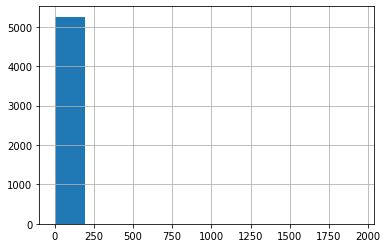

In [29]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count